In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
%matplotlib inline 

# Part a)

In [2]:
def low_rank_approximation(X, rank):
    u,s,vh = np.linalg.svd(X)
    left = np.matmul(u[:,:rank],np.diag(s[:rank]))
    right = vh[:rank,:]
    appx = np.matmul(left,right)
    return appx

In [3]:
face = imread("./data/face.jpg")
plt.imshow(face, cmap="gray")
plt.title("original")
plt.show()

face1 = low_rank_approximation(face, 5)
plt.imshow(face1, cmap="gray")
plt.title("rank-5")
plt.show()

face2 = low_rank_approximation(face, 20)
plt.imshow(face2, cmap="gray")
plt.title("rank-20")
plt.show()

face3 = low_rank_approximation(face, 100)
plt.imshow(face3, cmap="gray")
plt.title("rank-100")
plt.show()

# Part b)

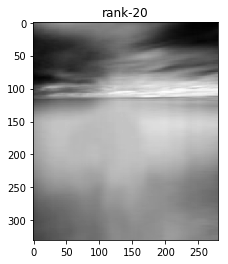

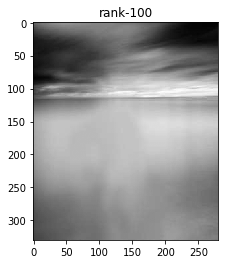

In [4]:
sky = imread("./data/sky.jpg")
plt.imshow(sky, cmap="gray")
plt.title("original")
plt.show()

sky1 = low_rank_approximation(sky, 5)
plt.imshow(sky1, cmap="gray")
plt.title("rank-5")
plt.show()

sky2 = low_rank_approximation(sky, 20)
plt.imshow(sky2, cmap="gray")
plt.title("rank-20")
plt.show()

sky3 = low_rank_approximation(sky, 100)
plt.imshow(sky3, cmap="gray")
plt.title("rank-100")
plt.show()

# Part c)

In [5]:
def mse(img1, img2):
    return np.mean(np.square(img1-img2))

In [6]:
face = imread("./data/face.jpg")
sky = imread("./data/sky.jpg")
mse_face,mse_sky,indices = [],[],[]
for i in range(1,101):
    indices.append(i)
    f_img = low_rank_approximation(face, i)
    s_img = low_rank_approximation(sky, i)
    mse_face.append(mse(face,f_img))
    mse_sky.append(mse(sky,s_img))
plt.plot(indices, mse_face, label="Face")
plt.plot(indices, mse_sky, label="Sky")
plt.xlabel("rank")
plt.ylabel("MSE")
plt.legend()

In [7]:
face = imread("./data/face.jpg")
face4 = low_rank_approximation(face, 40)
plt.imshow(face4, cmap="gray")
plt.title("rank-40")
plt.show()

In [8]:
sky = imread("./data/sky.jpg")
sky4 = low_rank_approximation(sky, 20)
plt.imshow(sky4, cmap="gray")
plt.title("rank-15")
plt.show()

Rank-40 is roughly when it gets hard to differentiate the face.

However, rank-20 is roughly when it gets hard to differentiate the sky.

A possible reason for the difference in face and sky minimum differential rank
is that the face image is significantly more complex and thus requires more eigenvalues/vectors
to encode/represent the basic structure and look of the image.